<a href="https://colab.research.google.com/github/ssrbazpur/BigQuery/blob/master/Second_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sys
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Data Science/nyc-taxi-265120-baf9a3e4cf9b.json"
%reload_ext google.cloud.bigquery

In [0]:
project_id = 'nyc-taxi-265120' 
from google.cloud import bigquery
client = bigquery.Client(project = project_id)

<h3> Cleaning Data </h3>

In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2018-06-29 13:43:46+00:00,2018-06-29 13:45:13+00:00,1,0.0,1,N,7,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-06-29 16:49:28+00:00,2018-06-29 16:49:28+00:00,1,0.0,5,Y,138,264,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-06-29 16:43:55+00:00,2018-06-29 16:43:55+00:00,1,0.0,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2018-06-29 16:03:42+00:00,2018-06-29 16:07:32+00:00,1,0.0,1,N,7,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2018-06-29 16:24:02+00:00,2018-06-29 16:25:55+00:00,1,0.0,1,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3> Total Trip amount is 0 </h3>

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount <= 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:

query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where tpep_pickup_datetime > tpep_dropoff_datetime LIMIT 10000
"""
df = client.query(query).to_dataframe()


In [0]:

query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()


In [0]:

query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 and total_amount<=0 LIMIT 10000
"""
df = client.query(query).to_dataframe()


In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount>0
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)


SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,

CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 AND td.daynumber<150
group by zone_id,A1,rounded_to_hour

"""
df1 = client.query(query).to_dataframe()


In [0]:
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
!pip install datalab

from datalab.context import Context

#Dont run this
gbq.to_gbq(b1, 'hello.2018Data', 'nyc-taxi-265120', if_exists='replace')

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019_CreatedDataset`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)


SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,

CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2019 AND td.daynumber<150
group by zone_id,A1,rounded_to_hour

"""
df = client.query(query).to_dataframe()

df.head()

df["time"]=pd.to_datetime(df['A1'] + ' ' + df['rounded_to_hour'])

df.head()

a=df.pivot_table("label", "time", "zone_id")

a.head()

b=df.pivot_table("label", "time", "zone_id").unstack().reset_index()

b.head()

b.rename( columns={0:'pickups'}, inplace=True )

b.head()

b1=b.fillna(0)

b1.head()

b1.shape

!pip install datalab

from datalab.context import Context

import pandas_gbq as gbq

from google.oauth2 import service_account

In [0]:
gbq.to_gbq(b1, 'hello.test_table', 'nyc-taxi-265120', if_exists='replace')

In [0]:
!pip install pyshp

     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=53cc82a56b0319dcdeb9618ae718f65cfbb66a69898f8ec71a2a44f40a75f0b0
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp


In [0]:
import shapefile

Reading Shape File 

In [0]:
sf = shapefile.Reader("/content/drive/My Drive/Data Science/taxi_zones.shp")
fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")
df_loc.head()

ShapefileException: ignored

In [0]:


query = """
WITH ZONE AS (
SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`
)
SELECT * ,ST_X(p) as longitude,
  ST_Y(p) as latitude FROM ZONE

"""
df = client.query(query).to_dataframe()




In [7]:
df.head()

,zone_id,zone_name,borough,zone_geom,p,longitude,latitude
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -...",POINT(-74.1740015721158 40.6918301401778),-74.174002,40.691830
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8...",POINT(-73.8474217808013 40.8644737230927),-73.847422,40.864474
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -...",POINT(-73.8901838169765 40.8676822144129),-73.890184,40.867682
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -...",POINT(-73.885867448807 40.8577794345822),-73.885867,40.857779
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -...",POINT(-73.8754760224878 40.8577456406536),-73.875476,40.857746


In [0]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

from datetime import datetime
import time
import seaborn as sns
import os
import math

import warnings

In [9]:
#detecting the pickups latitude and longitudes which are outside NYC.
outside_NYC = df[(df.latitude != 0) | (df.longitude != 0) ]
#latitude at equator is 0. Above equator latitude increases and becomes 90 at north pole. Below equator latitude decreases and
#is negative and becomes -90 at south pole.
#Longitude is 0 at United Kingdom(UK). To the right of UK, longitude increases positively and to the left of UK longitude decrease
#and is negative.

m = folium.Map(location = [40.5774, -73.7004], tiles = "Stamen Toner")

outside_pickups = outside_NYC.head(25000)

for i,j in outside_pickups.iterrows():
    if j["latitude"] != 0:
        folium.Marker(location=[j["latitude"], j["longitude"]],popup=j["zone_name"]).add_to(m)
m

In [10]:
outside_pickups.head()

,zone_id,zone_name,borough,zone_geom,p,longitude,latitude
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -...",POINT(-74.1740015721158 40.6918301401778),-74.174002,40.691830
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8...",POINT(-73.8474217808013 40.8644737230927),-73.847422,40.864474
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -...",POINT(-73.8901838169765 40.8676822144129),-73.890184,40.867682
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -...",POINT(-73.885867448807 40.8577794345822),-73.885867,40.857779
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -...",POINT(-73.8754760224878 40.8577456406536),-73.875476,40.857746


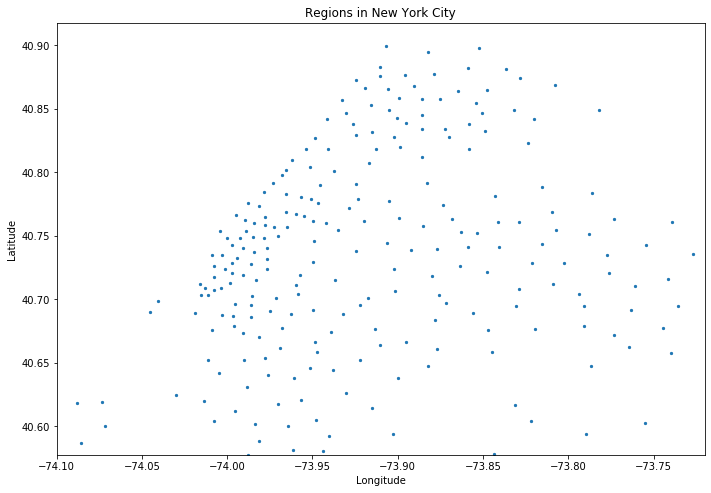

In [11]:
NYC_latitude_range = (40.5774, 40.9176)
NYC_Longitude_range = (-74.15, -73.7004)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = df.longitude.values[:70000], y = df.latitude.values[:70000], cmap = "Paired", s = 5)
ax.set_xlim(-74.10, -73.72)
ax.set_ylim(40.5774, 40.9176)
ax.set_title("Regions in New York City")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()